<h1 align="center"> US Police Shooting 👮🔫 with US 2017 demographic Census. </h1>
<h2 align="center"> EDA oriented to visualization by maps 🗺 of the US states </h2>

<img src="https://cdn.athlonoutdoors.com/wp-content/uploads/sites/8/2018/04/leo-shots18-lead.jpg" width="50%" />

Created: 2020-08-11

Last updated: 2020-09-014

Kaggle Kernel made by 🚀 <a href="https://www.kaggle.com/rafanthx13"> Rafael Morais de Assis</a>

Made in English (**🇺🇸**) and Portugues (**🇧🇷**). Is in progess...


## Kaggle Description

[Kaggle DataSet: US Police Shooting](https://www.kaggle.com/ahsen1330/us-police-shootings)

**🇺🇸**

**Context**

In the recent killings, a hot topic came into being, "Racism".
So, I chose to gather some data to take out some insights and analyze the story around racism in America.
I downloaded the raw data from kaggle and prepared it for visualization while correcting values, handling missing content, normalization and categorization

**Content !!!**

It contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect

**🇧🇷**

**Contexto**

Nos recentes assassinatos, surgiu um tema quente, "Racismo".
Então, eu escolhi reunir alguns dados para extrair alguns insights e analisar a história em torno do racismo na América.
Eu baixei os dados brutos do kaggle e os preparei para visualização enquanto corrigia valores, gerenciava o conteúdo ausente, normalização e categorização

**Conteúdo !!!**

Ele contém dados básicos sobre pessoas, como nome, idade, sexo e raça. Junto com ele, as informações de tiro / assassinato, como a data do evento, são onde aconteceu? como eles foram baleados? eles atacaram? Eles estavam segurando armas? Eles mostraram alguma doença mental? O policial estava usando uma câmera para gravar / o incidente foi registrado? O suspeito fugiu? Além disso, uma coluna de categoria contém o tipo de arma usada pelo suspeito.

## Others DataSets

**GeoJSON**

+ [HighCharts GeoJSON Maps](http://code.highcharts.com/mapdata/)
 - [direct lick to US States GeoJSON](http://code.highcharts.com/mapdata/countries/us/us-all.geo.json)

**US Census 2017**

+ [US Census 2017](https://www.kaggle.com/muonneutrino/us-census-demographic-data)

## Brief summary of the data set 

The dataset is 4000 rows (records) and 15 columns (features) between 01/2015 and 06/2020.

features = `['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
 'body_camera', 'arms_category']`

## Table of Contents

in progess... 

+ [Import Libs and DataSet](#index1)
+ [Snippets](#index02)
+ [Handle data: convert and missing data](#index03)

## Import Libs and DataSet <a id ='index01'></a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models.tools import HoverTool
from bokeh.models import GeoJSONDataSource
from bokeh.layouts import row
output_notebook()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading BokehJS ...

/kaggle/input/us-states-geojson/us-states.json
/kaggle/input/us-state-better-view/us-all.geo.json
/kaggle/input/us-police-shootings/shootings.csv
/kaggle/input/us-census-demographic-data/acs2015_county_data.csv
/kaggle/input/us-census-demographic-data/acs2017_census_tract_data.csv
/kaggle/input/us-census-demographic-data/acs2017_county_data.csv
/kaggle/input/us-census-demographic-data/acs2015_census_tract_data.csv


In [2]:
# Plots Format
pd.options.display.float_format = '{:.4f}'.format
sns.set(style="whitegrid")

In [3]:
# Import CSV
df = pd.read_csv("/kaggle/input/us-police-shootings/shootings.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0000,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0000,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

## Snippets <a id ='index02'></a>

In [5]:
def eda_categ_feat_desc_plot(series_categorical, title = ""):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], row['quantity'], color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [6]:
def eda_categ_feat_desc_df(series_categorical):
    """Generate DataFrame with quantity and percentage of categorical series
    @series_categorical = categorical series
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    return val_concat

In [7]:
def eda_numerical_feat(series, title=""):
    """
    Generate series.describe(), bosplot and displot to a series
    """
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5), sharex=False)
    print(series.describe())
    if(title != ""):
        f.suptitle(title, fontsize=18)
    sns.distplot(series, ax=ax1)
    sns.boxplot(series, ax=ax2)
    plt.show()

In [8]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, HoverTool, ColorBar
from bokeh.palettes import magma,viridis,cividis, inferno

def eda_us_states_geo_plot(geosource, df_in, title, column, state_column, low = -1, high = -1, palette = -1):
    """
    Generate Bokeh Plot to Brazil States:
        geosource: GeoJSONDataSource of Bokeh
        df_in: DataSet before transformed in GeoJSONDataSource
        title: title of plot
        column: column of df_in to be placed values in geoplot
        state_column: indicate column with names of States
        low = (optional) min value of range of color spectre
        high = (optional) max values of range of color spectre
        palette: (optional) can be magma, viridis, civis, inferno e etc.. (with number os colors)
            Example: cividis(8) (8 colors to classify), cividis(256)  (256, more colors to clasify)
    """
    if high == -1:
        high = max(df_in[column])
    if low == -1:
        low = min(df_in[column])
    if palette == -1:
        palette = inferno(32)
        
    palette = palette[::-1]
    color_mapper = LinearColorMapper(palette = palette, low = low, high = high)
    
    hover = HoverTool(tooltips = [ ('State','@{'+'name'+'}'), (column, '@{'+column+'}{%.2f}')],
                  formatters={'@{'+column+'}' : 'printf'})

    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 450, height = 20, 
                         border_line_color=None, location = (0,0),  orientation = 'horizontal')

    p = figure(title = title, plot_height = 400, plot_width = 500, tools = [hover])

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.visible = False
    p.yaxis.visible = False

    p.patches('xs','ys', source = geosource, line_color = 'black', line_width = 0.25,
              fill_alpha = 1, fill_color = {'field' : str(column), 'transform' : color_mapper})

    p.add_layout(color_bar, 'below')
    return p   

from bokeh.palettes import Turbo256 
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import magma,viridis,cividis, inferno

def eda_bokeh_horiz_bar_ranked(df, column_target, title = '', int_top = 3, second_target = 'state'):
    """
    Generate Bokeh Plot ranking top fists and last value:
        df: data_frame
        column_targe: a column of df inputed
        title: title of plot
        int_top: number of the tops
        column: column of df_in to be placed values in geoplot
        second_targe = 'state'
    """
    ranked = df.sort_values(by=column_target).reset_index(drop = True)
    top_int = int_top
    top = ranked[:top_int].append(ranked[-top_int:])
    top.index = top.index + 1
    source = ColumnDataSource(data=top)
    list_second_target = source.data[second_target].tolist()
    index_label = list_second_target[::-1] # reverse order label

    p = figure(plot_width=500, plot_height=400, y_range=index_label, 
                toolbar_location=None, title=title)   

    p.hbar(y=second_target, right=column_target, source=source, height=0.85, line_color="#000000",
          fill_color=factor_cmap(second_target, palette=inferno(16)[::-1], factors=list_second_target))
    p.x_range.start = 0  # start value of the x-axis

    p.xaxis.axis_label = "value of '" + column_target + "'"

    hover = HoverTool()  # initiate hover tool
    hover.tooltips = [("Value","@{" + column_target + "}{%.2f}" ),   
                       ("Ranking","@index°")]
    hover.formatters={'@{'+column_target+'}' : 'printf'}

    hover.mode = 'hline' # set the mode of the hover tool
    p.add_tools(hover)   # add the hover tooltip to the plot

    return p # show in notebook

def eda_geplot_state_rank_plot(my_df, primary_column, target_column, first_title, second_title, int_top = 8, location_column = 'state'):
    """
    Execute and show all together:
    @ primary_columns must to be a float to join to make a GeoSource
    generate_GeoJSONSource_to_districts()
    eda_seoul_districts_geo_plot()
    eda_bokeh_horiz_bar_ranked()
    """
    my_df = my_df.rename({primary_column: target_column}, axis = 1)

    geo_source = generate_GeoJSONSource_to_states(my_df)

    geo = eda_us_states_geo_plot(geo_source, my_df, first_title,
                                       target_column, location_column, palette = inferno(32))
    
    my_df['name_state'] = my_df['state'].map(lambda x: mapping_abrev_to_name[x])

    rank = eda_bokeh_horiz_bar_ranked(my_df, target_column, second_title,
                                      int_top = int_top, second_target = 'name_state')

    show( row( geo, rank ))

In [9]:
def eda_horiz_plot(df, x, y, title, figsize = (8,5), palette="Blues_d", formating="int"):
    """Using Seaborn, plot horizonal Bar with labels
    !!! Is recomend sort_values(by, ascending) before passing dataframe
    !!! pass few values, not much than 20 is recommended
    """
    f, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, data=df, palette=palette)
    ax.set_title(title)
    for p in ax.patches:
        width = p.get_width()
        if(formating == "int"):
            text = int(width)
        else:
            text = '{.2f}'.format(width)
        ax.text(width + 1, p.get_y() + p.get_height() / 2, text, ha = 'left', va = 'center')
    plt.show()

In [10]:
def eda_numerical_feat(series, title="", with_label=True, number_format=""):
    """ Generate series.describe(), bosplot and displot to a series
    @with_label: show labels in boxplot
    @number_format: 
        integer: 
            '{:d}'.format(42) => '42'
            '{:,d}'.format(12855787591251) => '12,855,787,591,251'
        float:
            '{:.0f}'.format(91.00000) => '91' # no decimal places
            '{:.2f}'.format(42.7668)  => '42.77' # two decimal places and round
            '{:,.4f}'.format(1285591251.78) => '1,285,591,251.7800'
            '{:.2%}'.format(0.09) => '9.00%' # Percentage Format
        string:
            ab = '$ {:,.4f}'.format(651.78) => '$ 651.7800'
    def swap(string, v1, v2):
        return string.replace(v1, "!").replace(v2, v1).replace('!',v2)
    # Using
        swap(ab, ',', '.')
    """
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5), sharex=False)
    print(series.describe())
    if(title != ""):
        f.suptitle(title, fontsize=18)
    sns.distplot(series, ax=ax1)
    sns.boxplot(series, ax=ax2)
    if(with_label):
        describe = series.describe()
        labels = { 'min': describe.loc['min'], 'max': describe.loc['max'], 
              'Q1': describe.loc['25%'], 'Q2': describe.loc['50%'],
              'Q3': describe.loc['75%']}
        if(number_format != ""):
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + number_format.format(v), ha='center', va='center', fontweight='bold',
                         size=8, color='white', bbox=dict(facecolor='#445A64'))
        else:
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + str(v), ha='center', va='center', fontweight='bold',
                     size=8, color='white', bbox=dict(facecolor='#445A64'))
    plt.show()
    
# eda_numerical_feat(df['age'], "Distribution of 'age'", number_format="{:.0f}")

## Handle data: convert and missing data <a id ='index03'></a>

**Missing Data**

In [11]:
# Check number of rows with null values

df.isnull().sum().max()

0

No Missing Data

**Convert Date to `datetime`**

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtypes

dtype('<M8[ns]')

## Understand each feature of DataSet  <a id ='index04'></a>


In [13]:
print(list(df.columns))

['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'arms_category']


### date 


In [14]:
print("fist record:", df['date'].min(), "| Last Record:",  df['date'].max())
df['date'].describe()

fist record: 2015-01-02 00:00:00 | Last Record: 2020-06-15 00:00:00


count                    4895
unique                   1792
top       2018-04-01 00:00:00
freq                        9
first     2015-01-02 00:00:00
last      2020-06-15 00:00:00
Name: date, dtype: object

## Manner of Death 

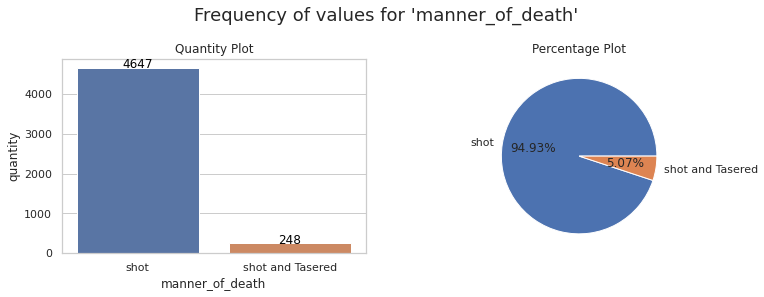

In [15]:
eda_categ_feat_desc_plot(df['manner_of_death'], "Frequency of values for 'manner_of_death'")

### armed 

In [16]:
eda_categ_feat_desc_df(df['armed'])

,armed,quantity,percentage
0,gun,2755,0.5628
1,knife,708,0.1446
2,unknown,418,0.0854
3,unarmed,348,0.0711
4,toy weapon,171,0.0349
...,...,...,...
84,walking stick,1,0.0002
85,chain saw,1,0.0002
86,wrench,1,0.0002
87,metal rake,1,0.0002


### Age

count   4895.0000
mean      36.5497
std       12.6943
min        6.0000
25%       27.0000
50%       35.0000
75%       45.0000
max       91.0000
Name: age, dtype: float64


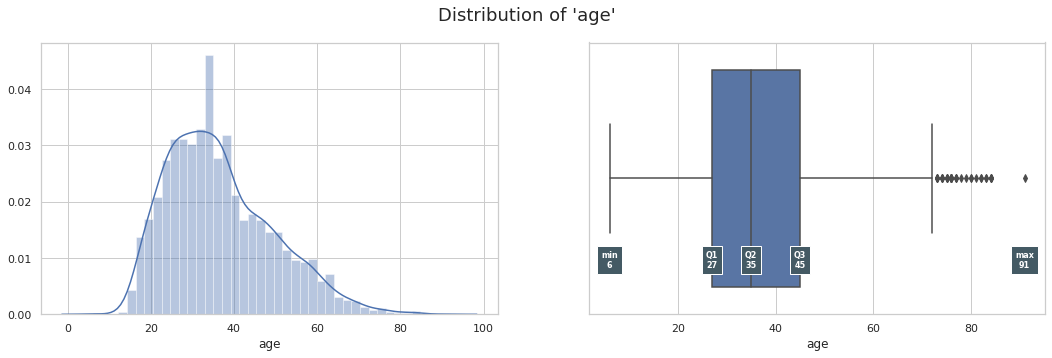

In [17]:
eda_numerical_feat(df['age'], "Distribution of 'age'", number_format="{:.0f}")

## Gender

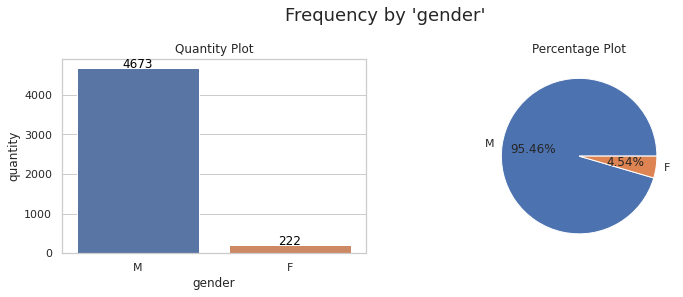

In [18]:
eda_categ_feat_desc_plot(df['gender'], "Frequency by 'gender'")

## Race

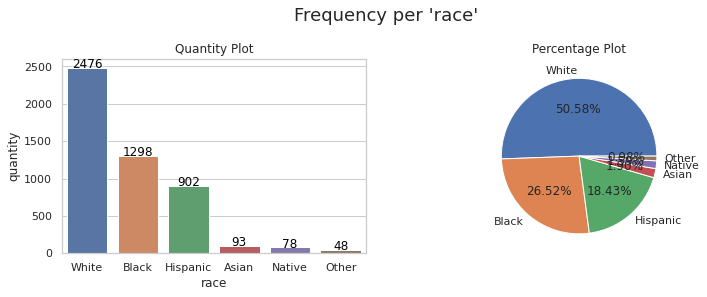

In [19]:
eda_categ_feat_desc_plot(df['race'], "Frequency per 'race'")

### City and State

2.258 (Big 3: Los Angeles (CA), Phoenix, Houston) city to 51 states (Big 3: CA, TX, FL) all states + DC (Washington, D.C.)

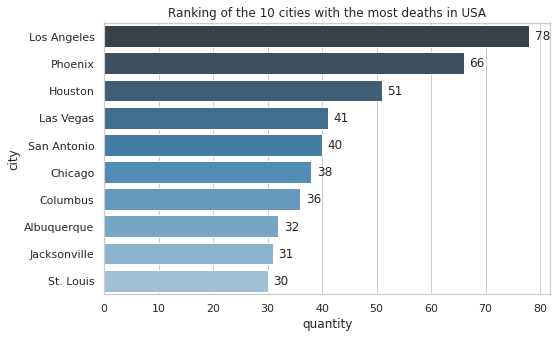

In [20]:
eda_horiz_plot(eda_categ_feat_desc_df(df['city']).head(10),
               'quantity', 'city', 'Ranking of the 10 cities with the most deaths in USA')

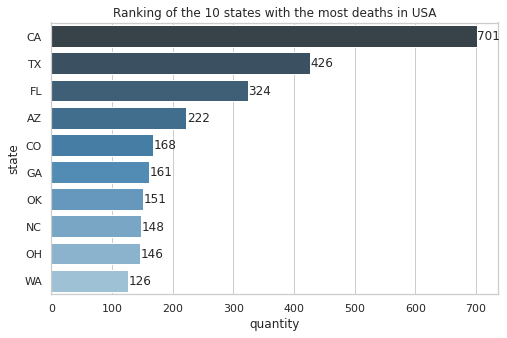

In [21]:
eda_horiz_plot(eda_categ_feat_desc_df(df['state']).head(10),
               'quantity', 'state', 'Ranking of the 10 states with the most deaths in USA')

### signs_of_mental_illness

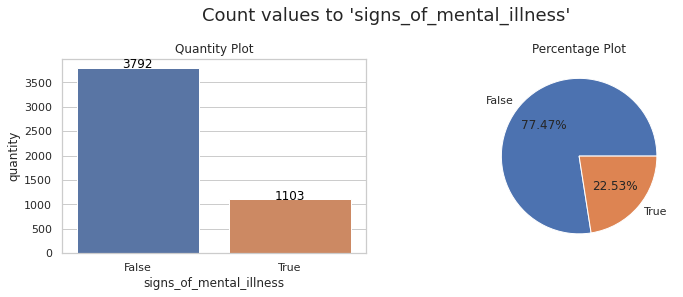

In [22]:
eda_categ_feat_desc_plot(df['signs_of_mental_illness'], "Count values to 'signs_of_mental_illness'")

### threat_level


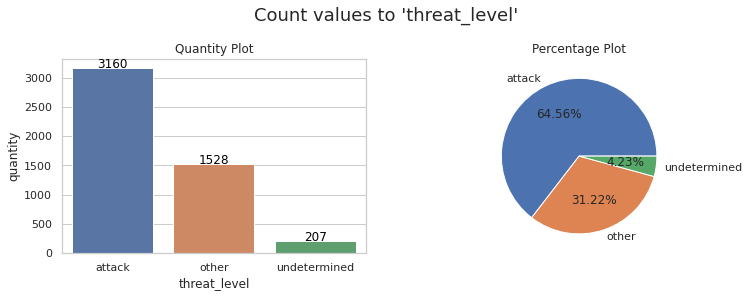

In [23]:
eda_categ_feat_desc_plot(df['threat_level'], "Count values to 'threat_level'")

### flee


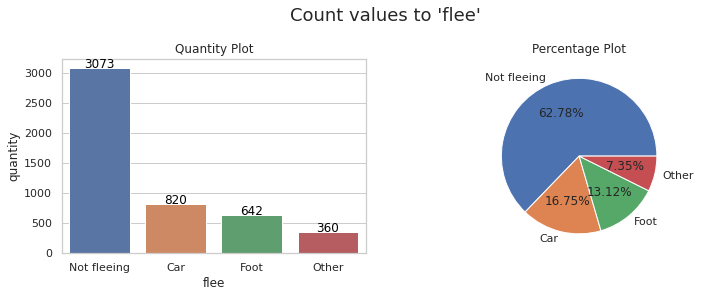

In [24]:
eda_categ_feat_desc_plot(df['flee'], "Count values to 'flee'")

### body_camera

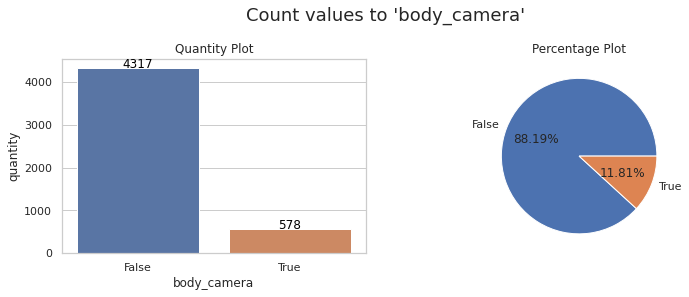

In [25]:
eda_categ_feat_desc_plot(df['body_camera'], "Count values to 'body_camera'")

### arms_category


In [26]:
eda_categ_feat_desc_df(df['arms_category'])

,arms_category,quantity,percentage
0,Guns,2764,0.5647
1,Sharp objects,818,0.1671
2,Unknown,418,0.0854
3,Unarmed,348,0.0711
4,Other unusual objects,192,0.0392
5,Blunt instruments,122,0.0249
6,Vehicles,121,0.0247
7,Multiple,54,0.0110
8,Piercing objects,29,0.0059
9,Electrical devices,24,0.0049


## Brief Summary of DataSet to each feature

**🇺🇸**

+ `id`: 
  - There is no useful information to be analyzed
+ `name`: 
  - There is no useful information to be analyzed
+ `date`: 
  - 1792 different dates. The most frequent date is January 4th, 2018 with 9 occurrences. Period between 01/02/2015 and 06/15/2020.
+ `manner_of_death`:
  -  About 95% per shot and 5% per shot and taser
+ `armed`:
  - There are 89 categories: gun (56%), knife (14%), unknown (8%), unarmed (7%), the others are less than 4% each and together they are 15%.
+ `age`:
  -  In general, between 20 to 40 years. Maximum: 91; minimum 6.
+ `gender`:
  -  95% male and 5% female
+ `race`:
  - Mostly 50% white, 25% black, 18% Hispanic
+ `city` and `state`:
  - 2,258 cities were registered (The 3 largest in occurrences: Los Angels (CA), Phoenix (AR) and Houston (TX)) of the 51 states (including Washington, D.C.). The 3 largest states are CA (California), TX (Texas) and FL (Florida).
+ `signs_of_mental_illness`:
  -  77% False (without mental illness) and 22% True (mentally ill)
+ `threat_level`:
  - 64% "attack", 31% "other", 4% "underteminded"
+ `flee`:
  - Not flee 62%, car 16%, Foot 13%, others 7% 
+ `body_camera`:
  - About 88% of the cases the police were not using the police body camera, in 12% they were using it.
+ `arms_category`:
  - Weapon category: 11 types. The ones with the highest amount per category were weapons (56%), sharp objects (16%), unknown (8%), without weapons (7%) and the rest each with less than 4% each.
  

🇧🇷 

+ `id`: 
 - Não há informação útil a ser analisada
+ `name`: 
 - Não há informação útil a ser analisada
+ `date`: 
  - 1792 datas diferentes. A data com maior frequencia é 04 de janiero de 2018 sendo 9 ocorrencias. Periodo entre 02/01/2015 e 15/06/2020. 
+ `manner_of_death` (Forma que ocorreu a mortes)
  - Cerca 95% de tiro e 5% de tiro e taser (arma elétrica)
+ `armed` (Armado?):
  -  Há 89 categoricas: arma (56%), faca (14%), desconhecido (8%), sem arma (7%), as outras são menos de 4% cada e juntas sao 15%.
+ `age`:
  -  Em geral, entre 20 a 40 anos. Maxímo: 91; mínimo 6.
+ `gender`:
  - 95% masculino e 5% feminino
+ `race`:
  - Em sua maioria 50% branco, 25% negro, 18% hispânico
+ `city` e `state`
  - Foram registrados 2.258 cidades (As 3 maiores em ocorrências: Los Angels (CA), Phoenix (AR) e Houston (TX)) dos 51 estado (incluindo Washington, D.C.). Os 3 maiores estados são CA (California),  TX (Texas) e FL (Florida).
+ `signs_of_mental_illness` (apresenta doença mental):
  -  77% Falso (sem doença mental) e 22% Verdadeiro (doente mental)
+ `threat_level`: (nível de ameaça)
  - 64% "attack", 31% "other", 4% "underteminded"
+ `flee` (fuga):
  - Não fogiu 62%, de carro 16%, a Pé 13%, outros 7%
+ `body_camera` (uso de camero corporal pela policia)
  - Cerca de 88% dos casos os policiais não estavam usando a câmera corporal da policia, em 12% estavam usando.
+ `arms_category`:
  - Categoria das armas: 11 tipos. As com maiores quantidade por categoria foram arma (56%), objeto pontiagudos (16%), desconhecido (8%), Sem arma (7%) e o restante cada um com menos de 4% cada.

## Import and prepare GeoJSON to generate visual map graphs of US states <a id ='index05'></a>

In [27]:
import geopandas as gpd

# import geojson
us_geojson_re = gpd.read_file('../input/us-state-better-view/us-all.geo.json')

# delete useless columns
list_to_delete = ['id', 'hc-group', 'hc-middle-x', 'hc-middle-y', 'hc-key', 'hc-a2',
       'labelrank', 'hasc', 'woe-id', 'state-fips', 'fips', 'country' , 'longitude',
       'woe-name', 'latitude', 'woe-label', 'type' ]
us_geojson_re = us_geojson_re.drop(list_to_delete, axis = 1)

# remove useless trace to separate Alaska and Havai
us_geojson_re = us_geojson_re.dropna()

us_geojson_re.head(1)

,postal-code,name,region,geometry
0,MA,Massachusetts,Northeast,"MULTIPOLYGON (((9430.000 7889.000, 9476.000 78..."


In [28]:
def generate_GeoJSONSource_to_states(my_df):
    """Function to generetae GeoJSONSource to generate plots"""
    global us_geojson
    geo_source = us_geojson_re.merge(my_df, left_on = 'postal-code', right_on = 'state')
    return GeoJSONDataSource( geojson = geo_source.to_json())

In [29]:
mapping_us_states = {
 'Alabama' : 'AL',
 'Alaska' : 'AK',
 'Arizona' : 'AZ',
 'Arkansas' : 'AR',
 'California' : 'CA',
 'Colorado' : 'CO',
 'Connecticut' : 'CT',
 'Delaware' : 'DE',
 'Florida' : 'FL',
 'Georgia' : 'GA',
 'Hawaii' : 'HI',
 'Idaho' : 'ID',
 'Illinois' : 'IL',
 'Indiana' : 'IN',
 'Iowa' : 'IA',
 'Kansas' : 'KS',
 'Kentucky' : 'KY',
 'Louisiana' : 'LA',
 'Maine' : 'ME',
 'Maryland' : 'MD',
 'Massachusetts' : 'MA',
 'Michigan' : 'MI',
 'Minnesota' : 'MN',
 'Mississippi' : 'MS',
 'Missouri' : 'MO',
 'Montana' : 'MT',
 'Nebraska' : 'NE',
 'Nevada' : 'NV',
 'New Hampshire' : 'NH',
 'New Jersey' : 'NJ',
 'New Mexico' : 'NM',
 'New York' : 'NY',
 'North Carolina' : 'NC',
 'North Dakota' : 'ND',
 'Ohio' : 'OH',
 'Oklahoma' : 'OK',
 'Oregon' : 'OR',
 'Pennsylvania' : 'PA',
 'Rhode Island' : 'RI',
 'South Carolina' : 'SC',
 'South Dakota' : 'SD',
 'Tennessee' : 'TN',
 'Texas' : 'TX',
 'Utah' : 'UT',
 'Vermont' : 'VT',
 'Virginia' : 'VA',
 'Washington' : 'WA',
 'West Virginia' : 'WV',
 'Wisconsin' : 'WI',
 'Wyoming' : 'WY',
 'District of Columbia': 'DC'
}

# reverse dict: key => values to values => key
mapping_abrev_to_name = {v: k for k, v in mapping_us_states.items()}

### Feature Engineering

In [30]:
df['state_name'] = df['state'].map(lambda state: mapping_abrev_to_name[state])
df['city_state'] = df['city'] + ', ' + df['state']
df['semester'] = ((pd.DatetimeIndex(df['date']).month.astype(int) - 1) // 6) + 1
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,state_name,city_state,semester,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0000,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,Washington,"Shelton, WA",1,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0000,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,Oregon,"Aloha, OR",1,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,Kansas,"Wichita, KS",1,2015


## Deep analysis on features <a id ='index06'></a>

````
**Analisar casos mesnores de 18 anos** e quais as ramra usadas

Onde é mais gravado?

Analisar dispositçao de genero com idade
````


## Underage cases

**🇺🇸**

The distribution of 'arms_category' is the same as for adults.

As for the distribution by race: It can be observed that for minors, more blacks end up dying (39% black, 32% white and 23% Hispanic) while in adults, whites are the biggest deaths (50% white, 26 % black and 18% Hispanic).

In terms of the sign of mental illness, it is slightly less than adults.

**🇧🇷**

A distribuição de 'arms_category' é a mesma de adultos.

Quanto a distribuição por raças: Pode-se obervar que para menores de idade acaba-se morrendo mais negros (39% negros, 32% brancos e 23% hispanicos) enquanto que nos adultos são os brancos as maiores mortes (50% brancos, 26% negros e 18% hispanicos).

Na questão de sinal de doença mental é umpouco menor do que adultos.



In [31]:
df_teen = df.query('age < 18')
df_teen.shape

(97, 19)

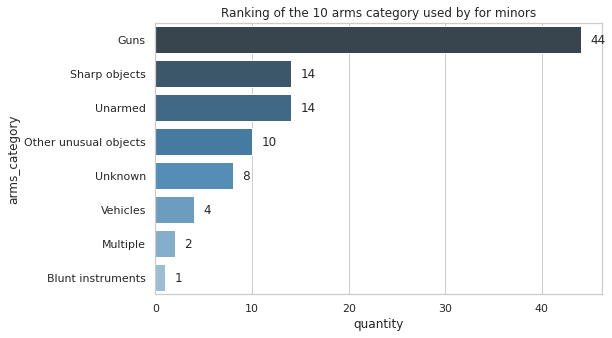

In [32]:
eda_horiz_plot(eda_categ_feat_desc_df(df_teen['arms_category']).head(10),
               'quantity', 'arms_category', 'Ranking of the 10 arms category used by for minors')

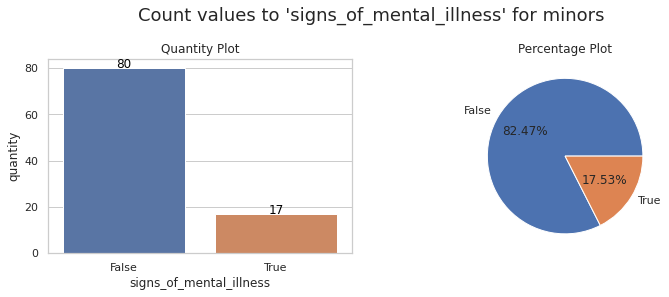

In [33]:
eda_categ_feat_desc_plot(df_teen['signs_of_mental_illness'], "Count values to 'signs_of_mental_illness' for minors")

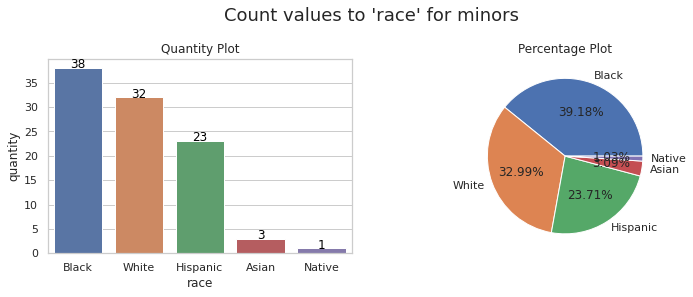

In [34]:
eda_categ_feat_desc_plot(df_teen['race'], "Count values to 'race' for minors")

## Questions on US states <a id ='index07'></a>

### Total deaths by state <a id ='index08'></a>

**🇺🇸**

California is the state with the highest number of deaths, followed by Texas, Florida and Arizona. It is clear that most of the deaths are in the south of the country. Ahead of the notebbok we will see that one of the reasons is that these states are very populous.

**🇧🇷**

California é o estado com maior número de mortos, em sequida Texas, Florida e Arizona. Percebe-se q eu a maior parte das mortes está no sul do país. Mais a frente do notebbok vamos ver que um dos motivos é por esses estados serem bem populosos.

In [35]:
primary_column = 'date'
target_column = 'count_occurrences'

df1 = df.groupby(['state']).count()[primary_column].reset_index()

eda_geplot_state_rank_plot(df1, primary_column, target_column,
                           "Total occurrences by state", "The first and last 8 on occurrences count")

### Analyzing the state of California CA

#### Top 10 Cities in CA per deaths

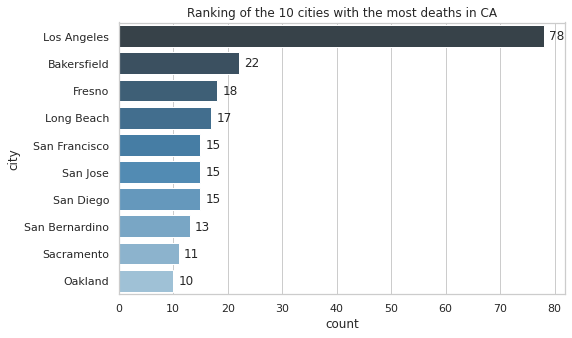

In [36]:
top_number = 10

df_california = df.query("state == 'CA'").groupby(['city']).count()['date'].sort_values(ascending = False).reset_index().rename({'date': 'count'}, axis = 1)

list_cities_CA = list(df_california.head(top_number)['city']) # Guard 'top_number' cities

eda_horiz_plot(df_california.head(top_number), 'count', 'city', 'Ranking of the 10 cities with the most deaths in CA')

#### Distribution of ocorrencies in CA

**🇺🇸**

The 10 cities with the most deaths end up representing a huge part of the deaths in california.

**🇧🇷**

As 10 cidade com mais mortes acabam representando uma enorme parte das mortes na california.

Count Cities with deaths in CA: 302  cities 

count   302.0000
mean      2.3212
std       5.1321
min       1.0000
25%       1.0000
50%       1.0000
75%       2.0000
max      78.0000
Name: count, dtype: float64


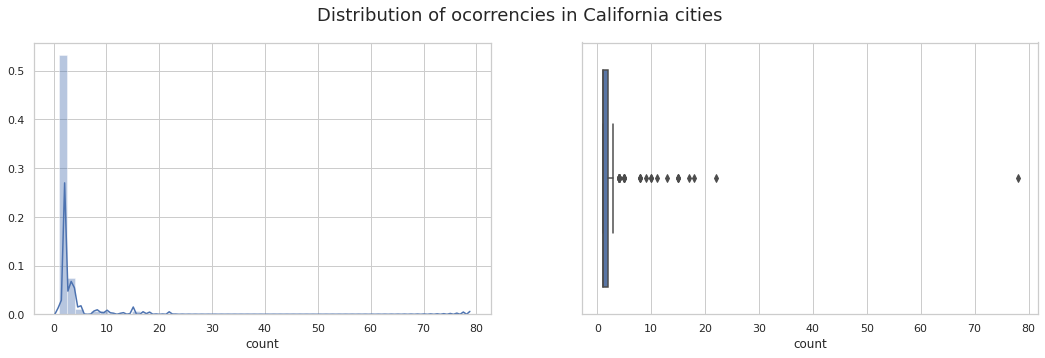

In [37]:
print("Count Cities with deaths in CA:", len(df_california), ' cities \n')

eda_numerical_feat(df_california['count'], "Distribution of ocorrencies in California cities", with_label=False)

#### Evolution of Death in CA Top 10 Cities

**🇺🇸**

In California, most cities have up to 6 events per year. Los Angeles is an outilier having about twice as much or more than any other city in California each year. It is necessary to remember that in 2020 the records cover until June 2020, that is, it does not cover the entire year

**🇧🇷**

Na California a maioria das cidade tem até cerca de 6 ocorrencias por ano. Los Angeles é um outilier tendo cerca do dobro ou mais de qualquer outras cidade da California a cada ano. É necessário lembrar que em 2020 os registros cobrem até Junho de 2020, ouse seja, não cobre o ano inteiro


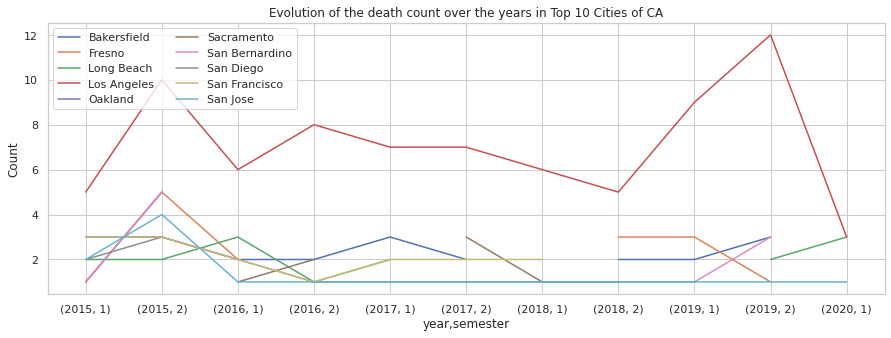

In [38]:
# Plot evolution of bigges 'top_int' city in california

df_california_re = df.query("state == 'CA'")
df_california_re = df.query("city in " + str(list_cities_CA))

fig, ax = plt.subplots(figsize=(15,5))

df_CA = df_california_re.groupby(['year','semester','city']).count()['id'].unstack()
df_CA.plot(ax=ax)

ax.set_ylabel("Count")
ax.set_title("Evolution of the death count over the years in Top 10 Cities of CA")

x_axis = list(df_CA.index)
ax.set_xticks(range(0,len(x_axis)))
ax.set_xticklabels(x_axis)

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.grid(True)
plt.show()

## Evolution of total deaths by top 10 Cities in USA

**🇺🇸**

After Los Angeles (CA), Phoenix (AR) has a large number of occurrences. Chicago (IL) and Houston (TX) have had great numbers and have been decreasing since counting began

**🇧🇷**

Depois de Los Angeles (CA), Phonenix (AR) tem um grande número de ocorencias. Chicago (IL) e Houston (TX) já tiveram grandes numero e tem diminuindo desde que começou a contagem

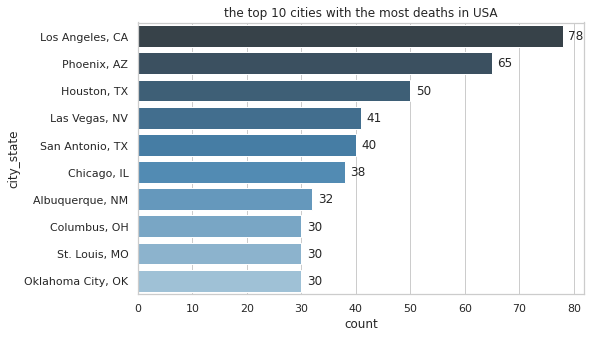

In [39]:
top_number = 10

df_tops = df.groupby(['city_state']).count()['date'].sort_values(ascending = False).reset_index().rename({'date': 'count'}, axis = 1)

list_cities_tops = list(df_tops.head(top_number)['city_state']) # guard 'top_number' biggers count number

eda_horiz_plot(df_tops.head(top_number), 'count', 'city_state', 'the top 10 cities with the most deaths in USA')

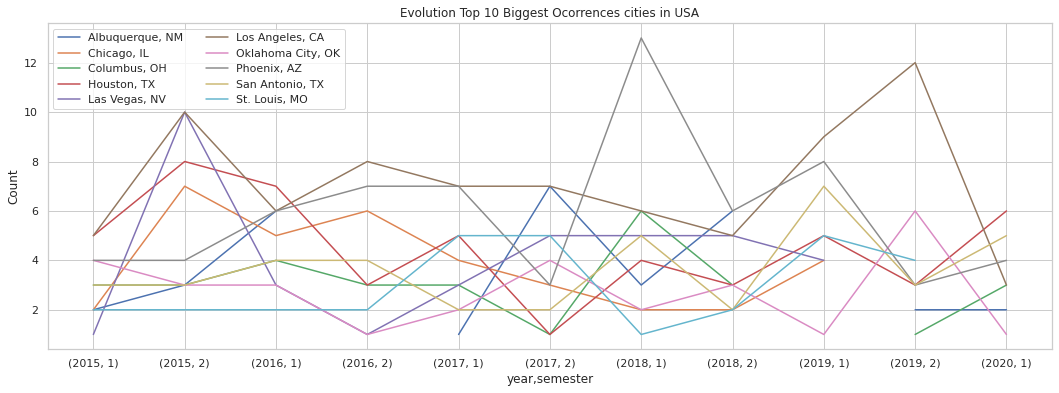

In [40]:
df_california_re = df.query("city_state in " + str(list_cities_tops))

fig, ax = plt.subplots(figsize=(18,6))

df_CA = df_california_re.groupby(['year','semester','city_state']).count()['id'].unstack()
df_CA.plot(ax=ax)
x_axis = list(df_CA.index)

ax.set_ylabel("Count")
ax.set_title("Evolution Top 10 Biggest Ocorrences cities in USA")

# Set more labels (sem isso so vai mostrar os semestre 1 e nao o 2)
ax.set_xticks(range(0,len(x_axis)))
ax.set_xticklabels(x_axis)

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=2)
plt.show()

## Evolution of total deaths per state 

Evolution in the number of deaths per state over the years (Interactive plot with Bokeh). To Top 10 and Bottom 10 states

**🇺🇸**

Not much can be said about 2020 as it is not over, but we can see that in general cases have fallen in recent years

**🇧🇷**

Não se pode dizer muita coisa sobre 2020 pois não acabou, mas podemos perceber que em geral os caso tem caido nos últimos anos

In [41]:
# generate df to plot

df['year'] = pd.DatetimeIndex(df['date']).year
df_re = df.groupby(['year','state_name']).count()['id'].unstack() #unstack is important to make easy make line plot
df_re = df_re.fillna(0) # case dont exist data in this time
# df_re

In [42]:
# get top and bototm 10 in ranking

int_ranking = 5 
df_top_count = df.groupby(['state_name']).count()['id'].reset_index().sort_values(by="id", ascending=False)
top_10_state = list(df_top_count['state_name'][:int_ranking])
bottom_10_state = list(df_top_count['state_name'][-int_ranking:])
print(top_10_state, "\n", bottom_10_state)

['California', 'Texas', 'Florida', 'Arizona', 'Colorado'] 
 ['New Hampshire', 'North Dakota', 'Delaware', 'Vermont', 'Rhode Island']


In [43]:
from bokeh.palettes import Turbo256
from bokeh.models import Legend

# define pallets of colors
turbo_pallete = Turbo256[0:256:int(256/ (len(top_10_state) + len(bottom_10_state)) )][::-1]

# define x axis
x_axis = np.array([2015,2016,2017,2018,2019,2020])

fig = figure(title="Evolution of the first and last 10 state per total count occorrencies",
             plot_width=800, plot_height=450, x_axis_type="linear")

# is necessary generate a list to put state name in each circle plot with "soruce_re"
def g_list(desc, length):
    l = []
    for i in range(length):
        l.append(desc)
    return l

# Plot Lines
count = 0

for d in top_10_state:
    source_re = ColumnDataSource(dict(x=x_axis, y=np.array(df_re[d]), name=g_list(d, len(x_axis))))
    line = fig.line('x', 'y', legend_label=d, color=turbo_pallete[count] ,line_width=3, source = source_re)
    fig.circle('x', 'y', legend_label=d, color=turbo_pallete[count], fill_color='white', size=7, source = source_re)
    count += 1
    
for d in bottom_10_state:
    source_re = ColumnDataSource(dict(x=x_axis, y=np.array(df_re[d]), name=g_list(d, len(x_axis))))
    line = fig.line('x', 'y', legend_label=d, color=turbo_pallete[count] ,line_width=3, source = source_re)
    fig.circle('x', 'y', legend_label=d, color=turbo_pallete[count], fill_color='white', size=7, source = source_re)
    count += 1

# plot title
fig.legend.title = 'State'
# Relocate Legend
fig.legend.location = 'bottom_left'
# Click to hide/show lines
fig.legend.click_policy = 'hide'
# Add Hover
fig.add_tools(HoverTool(tooltips=[('State', '@name'),('Year', '@x'),('Count', '@y{%.1f}')], formatters={'@y' : 'printf'} ))

show(fig)

## Total number of deaths by race to each state

**🇺🇸**

In the total count of cases by deaths for all races, we observe that the top 3 are CA, TX and FL very populous states.

**🇧🇷**

Na contagem total de casos por mortes para todas as raças, observamos que os top 3 sâo CA, TX e FL estados bastante populosos.

### Total Black death by state

**🇺🇸**

An interesting fact is that blacks appear to suffer a lot of violence near DC and NY, that is, in the northeast, something that does not happen so much with any other race

**🇧🇷**

Um dado interessante é que os negros aparecem sofrer bastante violencia perto de DC e NY, ou seja, no nordeste, algo que nao acontece tanto com qualquer outra raça

In [44]:
primary_column = 'race'
target_column = 'number_of_occurrences'

df_plot = df.query("race == 'Black'").groupby(['state']).count()[primary_column].reset_index()

eda_geplot_state_rank_plot(df_plot, primary_column, target_column,
                           "Total number of Black deaths by state", "The first and last 8 on total death count to black race")

### Total Hispanic death by state

**🇺🇸**

Hispanics have more cases in the southwest and Florida. Whereas blacks have more on the east coast and there is no chaos among Hispanics with the exception of the populous states mentioned before (CA, TX, FL).

**🇧🇷**

Os hispanicos tem mais casos no sudoeste  e Florida. Enquanto que os negros  tem mais na costa leste e nao tem no caos dos hispanicos com exeçâo dos estados populosos mensionados antse (CA, TX, FL).

In [45]:
primary_column = 'race'
target_column = 'number_of_occurrences'

df_plot = df.query("race == 'Hispanic'").groupby(['state']).count()[primary_column].reset_index()

eda_geplot_state_rank_plot(df_plot, primary_column, target_column,
                           "Total number of Hispanic deaths by state", "The first and last 8 on total death count to hispanic race")

### Total White death by state

In [46]:
primary_column = 'race'
target_column = 'number_of_occurrences'

df_plot = df.query("race == 'White'").groupby(['state']).count()[primary_column].reset_index()

eda_geplot_state_rank_plot(df_plot, primary_column, target_column,
                           "Total number of White deaths by state", "The first and last 8 on total death count to white race")

### Total Asian death by state

**🇺🇸**

For the cases of Asian Asians, the curious was the states of Washington and Hawaii, thus characterizing states further east, perhaps because it is closer to Asia.

**🇧🇷**

Para os casos de asiaticos asiaticos o curioso foi os estados de Washington e Havai, caracterizando assim estados mais ao leste, talvez por estar mais perto da asia.

In [47]:
primary_column = 'race'
target_column = 'number_of_occurrences'

df_plot = df.query("race == 'Asian'").groupby(['state']).count()[primary_column].reset_index()

eda_geplot_state_rank_plot(df_plot, primary_column, target_column,
                           "total occurrences by state asian", "The first and last 8 on ocorrencies count:asian")

<!-- 
# ATENÇÂO: EM VÁRIOS GRÁFICOS COM ESTAOD, PODMEOS PERCEBER QUE QUE A QUANTIDADE DE CASOS ESTÁ RELACIONADA A QUANTIDADE DE POPULÇÂO, QUANTO MAIOR, HAVERA MAIS CASOS PARA TODOS OS TIPOS DE OCOREENCIAS QUE PODEM.

SERIA MAIS INTERRESSANTE FAZER ALGO COMO Casos por 100k habitantes ou algo do tipo parapodemos comprara com mais honestidade os estado: ex: Compara DC com o estado da CA em número de mortos, nao importa o caos CA vai ser sempre maior pois é o mais populoso do pais. Entâo, ffaça isso

````
primary_column = 'race'
target_column = 'number_of_occurrences'

df_plot = df.query("manner_of_death == 'shot and Tasered'").groupby(['state']).count()[primary_column].reset_index()

eda_geplot_state_rank_plot(df_plot, primary_column, target_column,
                           "total occurrences by state in tasered casses", "The first and last 8 on ocorrencies count: tasered casses")

````
-->

## Prepare 2017 US Demographic Census Data Set

In [48]:
# import census dataset
df_census = pd.read_csv("../input/us-census-demographic-data/acs2017_county_data.csv")
# delete 'Puerto Rico' cuz dont have data in US shooting dataset
list_indexs = df_census[ df_census['State'] == 'Puerto Rico'].index 
df_census = df_census.drop(list_indexs)
# map states to abreviations
df_census['state'] = df_census['State'].map(lambda x: mapping_us_states[x])
df_census.head(1)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,state
0,1001,Alabama,Autauga County,55036,26899,28137,2.7000,75.4000,18.9000,0.3000,...,1.3000,2.5000,25.8000,24112,74.1000,20.2000,5.6000,0.1000,5.2000,AL


In [49]:
print(list(df_census.columns))

['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'state']


In [50]:
# Feature Engineering to census

df_census["BlackPopulation"] = ((df_census["TotalPop"]/100) * df_census["Black"]).astype('int')
df_census["HispanicPopulation"] = ((df_census["TotalPop"]/100) * df_census["Hispanic"]).astype('int')
df_census["WhitePopulation"] = ((df_census["TotalPop"]/100) * df_census["White"]).astype('int')
df_census["AsianPopulation"] = ((df_census["TotalPop"]/100) * df_census["Asian"]).astype('int')
df_census["NativePopulation"] = ((df_census["TotalPop"]/100) * df_census["Native"]).astype('int')

### Total population per state

**🇺🇸**

The top 3 states with the most people are California (CA), Texas (TX) and Florida (FL). States that usually appear in the ranking of everything seen so far, a big reason must be this, the number of people is greater in these states.

**🇧🇷**

Os top 3 estados com mais pessoas sâo california (CA), Texas (TX) e Florida (FL). Estados esses que costumam aparecer no ranking de tudo visto até agora, um grande motivo deve ser esse, a quantidade de pessoas é maior nesses estados.

In [51]:
primary_column = 'TotalPop'
target_column = 'population'

total_pop = df_census.groupby(['state']).sum()['TotalPop'].reset_index().sort_values(by="TotalPop", ascending=False)

eda_geplot_state_rank_plot(total_pop, primary_column, target_column,
                           "Population by 2017 census", "The first and last 8 on ocorrencies count: tasered casses")

### Total black population per state

**🇺🇸**

It is curious that California, which is always at the top of the rankings, now ranks fourth, losing to the states of Texas, Georgia, Floria and New York in terms of black population.

**🇧🇷**

Curioso que California, que costuma ficar sempre no topo dos rankings agora fica em quarto, perdendo para os estados de Texas, Georgia, Floria e New York em quantidade de população negra.

In [52]:
primary_column = 'BlackPopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)

eda_geplot_state_rank_plot(df3, primary_column, target_column,
                           "Total Black per states by the 2017 census", "The first and last 8 on total black population")

###  Total hispanic population per state

**🇺🇸**

ranking by the top 3 states with the largest population.

**🇧🇷**

ranking pelo top 3 estados com maior população.

In [53]:
primary_column = 'HispanicPopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)

eda_geplot_state_rank_plot(df3, primary_column, target_column,
                           "Total Hispanics per states by the 2017 census", "The first and last 8 on total hispanic population")

###  Total white population per state

**🇺🇸**

ranking by the top 3 states with the largest population.

**🇧🇷**

ranking pelo top 3 estados com maior população.

In [54]:
primary_column = 'WhitePopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)

eda_geplot_state_rank_plot(df3, primary_column, target_column,
                           "Total white per states by the 2017 census", "The first and last 8 on total white population")

###  Total asian population per state

In [55]:
primary_column = 'AsianPopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)

eda_geplot_state_rank_plot(df3, primary_column, target_column,
                           "Total asian per states by the 2017 census", "The first and last 8 on total asian population")

###  Total native population per state


In [56]:
primary_column = 'NativePopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)

eda_geplot_state_rank_plot(df3, primary_column, target_column,
                           "Total native per states by the 2017 census", "The first and last 8 on total native population")

## Percentage of races by state

**🇺🇸**

Let's look at where there are more people by race over the population.

**🇧🇷**

Vamos analisar onde tem mais pessoas por raça sobre a população. 


### Percentage of Hispanics by state

**🇺🇸**

The most southern and southwestern states have the highest percentage of Hispanics. Realize that now the top is no longer California, but New Mexico

**🇧🇷**

Os estados mais ao sul e sudoeste tem as maiores porcentagem de hispanicos. Perceba que agora o top nâo é mais Califnornia, e sim New Mexico

In [57]:
primary_column = 'HispanicPopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)
df4 = df3.merge(total_pop, left_on = 'state', right_on = 'state')
df4['percentage_hispanic'] = df4['HispanicPopulation'] / df4['TotalPop']
df4 = df4.sort_values(by='percentage_hispanic', ascending=False)

primary_column = 'percentage_hispanic'
eda_geplot_state_rank_plot(df4, primary_column, target_column,
                           "Percentage of Hispanics by state", "The first and last 8 in % Hipanics by state")

### Percentage of Black by state

**🇺🇸**

Before, one of the states that had more blacks was Florida Now, looking at percentages, we see that blacks have more people in proportion in the southeastern states.

**🇧🇷**

Antes um dos estados que mais tinha negros era a FLorida Agora, olhando por porcentagem, vemos que os negros tem mais pessoas em proporçâo nos estados suldestes.

In [58]:
primary_column = 'BlackPopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)
df4 = df3.merge(total_pop, left_on = 'state', right_on = 'state')
df4['percentage_black'] = df4['BlackPopulation'] / df4['TotalPop']
df4 = df4.sort_values(by='percentage_black', ascending=False)

primary_column = 'percentage_black'
eda_geplot_state_rank_plot(df4, primary_column, target_column,
                           "Percentage of Black by state", "The first and last 8 in % Black by state")

### Percentage of White by state

**🇺🇸**

Northernmost states in the United States have a higher prevalence of whites compared to other races.

**🇧🇷**

Estados mais ao norte dos estados unidos tem maior prevalencia de brancos em comparação as outra raças.

In [59]:
primary_column = 'WhitePopulation'
target_column = 'population'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)
df4 = df3.merge(total_pop, left_on = 'state', right_on = 'state')
df4['percentage_White'] = df4['WhitePopulation'] / df4['TotalPop']
df4 = df4.sort_values(by='percentage_White', ascending=False)

primary_column = 'percentage_White'
eda_geplot_state_rank_plot(df4, primary_column, target_column,
                           "Percentage of White by state", "The first and last 8 in % White by state")

### Percentage of Asians per state

**🇺🇸**

Far East (Hawaii and California) and Far East (New York and New Jersey)

**🇧🇷**

Extremo leste (Havai e California) e extremo leste (Nova york e new Jersey)

In [60]:
primary_column = 'AsianPopulation'
percentage_column = '%_asian_pop'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)
df4 = df3.merge(total_pop, left_on = 'state', right_on = 'state')
df4[percentage_column] = df4[primary_column] / df4['TotalPop']
df4 = df4.sort_values(by=percentage_column, ascending=False)

eda_geplot_state_rank_plot(df4, percentage_column, percentage_column,
                           "Percentage of Asian by state", "The first and last 8 in % Asian by state")

###  Total native population per state

**🇺🇸**

Alaska and north and south of the central united states

**🇧🇷**

Alaska e norte e sul do centro dos estados unidos

In [61]:
primary_column = 'NativePopulation'
percentage_column = '%_native_pop'

df3 = df_census.groupby(['state']).sum()[primary_column].reset_index().sort_values(by=primary_column, ascending=False)
df4 = df3.merge(total_pop, left_on = 'state', right_on = 'state')
df4[percentage_column] = df4[primary_column] / df4['TotalPop']
df4 = df4.sort_values(by=percentage_column, ascending=False)

eda_geplot_state_rank_plot(df4, percentage_column, percentage_column,
                           "Percentage of Native by state", "The first and last 8 in % Native by state")

**🇺🇸**

Notes: 

We can say that: as a percentage of the race population by state, Hispanics are in the south of the west, blacks in the south east and whites in the north.

**🇧🇷**

Observações:



Podemos dizer que: em questão de porcentagem da população de raças por estados, os hispanicos estao no sul do oeste, os negros no suldeste e os brancos no norte.

## Ratio 100,000 habitants

**calculus: number of cases * 100,000 / total population**

**🇺🇸**

The goal is to allow comparison between locations with different population sizes. Without it, California ends up being the leader of chaos for having the largest population. Without this type of evaluation, the following error could occur:

Hypothetically: 1000 homicides in California and 1000 homicides in Maine would have the same weight, considering that at a rate of 100,000 inhabitants, as CA has 38 million, and WY has half a million:

+ Wyoming: `1000 * 100000/500000 = 200 homicides per 100 thousand inhabitants`
+ California: `1000 * 100000/38000000 = 2.63157894737 homicides per 100 thousand inhabitants`

That is, this number of homicides in Wyoming has a greater impact than in California even though it has the same number of homicides

**🇧🇷**

O objetivo é permitir a comparação entre locais com diferentes tamanhos de população. Sem isso California acaba sendo o lidere de caos por ter  a maior populaçâo. Sem esse tipo de avaliação poderia-se ocorrer os seguinte erro:

Hipoteticamente: 1000 homicidios na California e 1000 homicidios no Maine teriam o mesmo peso, sendo que, considerando em taxa de 100.000 habitantes,  como CA tem 38 milhoes, e WY tem meio milhao:

+ Wyoming: `1000*100000/500000 = 200 homicidios por 100 mil habitantes`
+ California: `1000*100000/38000000 = 2.63157894737 homicidios por 100 mil habitantes`

Ou seja, Essa quantidade de homicidios em Wyoming tem maior impacto que na California mesmo tendo o mesmo numero de homicidos

In [62]:
df_total_population = df_census.groupby(['state']).sum()['TotalPop'].reset_index().sort_values(by='TotalPop', ascending=False)
df_total_population.head()

,state,TotalPop
4,CA,38982847
43,TX,27419612
9,FL,20278447
34,NY,19798228
14,IL,12854526


### Death ratio per states

In [63]:
column_name = 'death_ratio'

df1 = df.groupby(['state']).count()['id'].reset_index().rename({"id": "count"}, axis=1)
df1 = df1.merge(df_total_population, left_on="state", right_on="state")

df1[column_name] = (df1['count'] * 100000) / df1['TotalPop']
df1.head()

eda_geplot_state_rank_plot(df1, column_name, column_name,
                           "death rate per 100 thousand inhabitants", "The first and last 8 on death rate")

### death ratio for black per state

**🇺🇸**

southeastern states and around Arkansas has a high black death rate. This also coincides with the states with the highest percentage of blacks in the population

**🇧🇷**

estados ao sudeste e ao redor de Arkansas tem grande taxa de mortes de negro. Isso coincide também com os estados com maior porcentagem de negros na população

In [64]:
column_name = 'black_death_ratio'

df1 = df.query("race == 'Black'").groupby(['state']).count()['id'].reset_index().rename({"id": "count"}, axis=1)
# df1 = df1.merge(df_total_population, left_on="state", right_on="state")
df1 = df1.merge(df_total_population, left_on="state", right_on="state", how="right")
df1 = df1.fillna(0.0)
df1[column_name] = (df1['count'] * 100000) / df1['TotalPop']
df1.head()

eda_geplot_state_rank_plot(df1, column_name, column_name,
                           "black death rate per 100 thousand inhabitants", "The first and last 8 on black death rate")

### death ratio for hispanic per state

**🇺🇸**

The highest rates coincide with the states and regions where there is a population with a higher percentage of Hispanics.

**🇧🇷**

As maiores taxa Coincide  com os estados e regioes onde se uma populaçâo com maior porcentagem de hispanicos.

In [65]:
column_name = 'hispanic_death_ratio'

df1 = df.query("race == 'Hispanic'").groupby(['state']).count()['id'].reset_index().rename({"id": "count"}, axis=1)
# df1 = df1.merge(df_total_population, left_on="state", right_on="state")
df1 = df1.merge(df_total_population, left_on="state", right_on="state", how="right")
df1 = df1.fillna(0.0)
df1[column_name] = (df1['count'] * 100000) / df1['TotalPop']

eda_geplot_state_rank_plot(df1, column_name, column_name,
                           "hispanic death rate per 100 thousand inhabitants", "The first and last 8 on hispanic death rate")

### death ratio for white per state

**🇺🇸**

The death rate for whites is quite diverse, covering several states in very different regions.

**🇧🇷**

A taxa de morte para brancos é bem diversificada, cobrindo varios estados de regioes bem distinstas.

In [66]:
column_name = 'white_death_ratio'

df1 = df.query("race == 'White'").groupby(['state']).count()['id'].reset_index().rename({"id": "count"}, axis=1)
df1 = df1.merge(df_total_population, left_on="state", right_on="state")

df1[column_name] = (df1['count'] * 100000) / df1['TotalPop']

eda_geplot_state_rank_plot(df1, column_name, column_name,
                           "white death rate per 100 thousand inhabitants", "The first and last 8 on white death rate")

### Some Conclusions

**🇺🇸**

Alaska is a place with a high death rate.
New Mexico has a high rate probably due to the death rate of Hispanics, which is high

**🇧🇷**

Alaska é um lugar com grande taxa de morte.

Novo Mexico tem uma grande taxa provavelmente por conta da taxa de mortes de hispanicos, que é alta

## black death rate in 2020

**🇺🇸**

Apparently several do not present data in that year yet

**🇧🇷**

Aparentemente varios nâo apresentam dados nesse ano ainda

In [67]:
column_name = 'black_death_ratio'

df1 = df.query("race == 'Black'").query('year == 2020').groupby(['state']).count()['id'].reset_index().rename({"id": "count"}, axis=1)
df1 = df1.merge(df_total_population, left_on="state", right_on="state", how="right")
df1 = df1.fillna(0.0)
df1[column_name] = (df1['count'] * 100000) / df1['TotalPop']
df1.head()

eda_geplot_state_rank_plot(df1, column_name, column_name,
                           "black death rate per 100 thousand inhabitants in 2020", "The first and last 8 on black death rate in 2020")

### Evolution of black death rate in Minnesota

**🇺🇸**

It presents missing data in some periods. But considering, the cases have increased over the years

**🇧🇷**

Aprecsenta dados faltantes em alguns periodos. Mas considerando, os casos tem aumentado com o decorrer dos anos

In [68]:
df1 = df.query("race == 'Black'").query('state == "MN"')
df1 = df1.sort_values('date', ascending=False)
df1.head(1) # Max date to Black case in Minnesota . Dont have cases REGISTED in 2020

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,state_name,city_state,semester,year
4246,5037,Ronald Davis,2019-09-15,shot,knife,31.0000,M,Black,St. Paul,MN,False,attack,Not fleeing,True,Sharp objects,Minnesota,"St. Paul, MN",2,2019


,year,semester,state,count,TotalPop,black_death_ratio,year_semester
0,2015,1,MN,503,5490726,9.1609,2015 | 1
1,2015,2,MN,1012,5490726,18.4311,2015 | 2
2,2016,1,MN,1520,5490726,27.6830,2016 | 1
3,2016,2,MN,1694,5490726,30.8520,2016 | 2
4,2017,1,MN,2418,5490726,44.0379,2017 | 1
5,2018,1,MN,3796,5490726,69.1348,2018 | 1
6,2018,2,MN,4168,5490726,75.9098,2018 | 2
7,2019,2,MN,9948,5490726,181.1782,2019 | 2


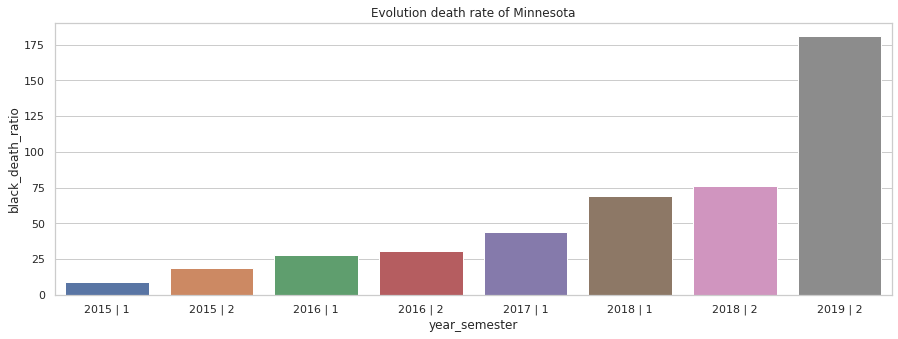

In [69]:
df1 = df.query("race == 'Black'").query('state == "MN"')
df1 = df1.groupby(['year','semester','state']).sum()['id'].reset_index().rename({"id": "count"}, axis=1)
df1 = df1.merge(df_total_population, left_on="state", right_on="state")
df1['black_death_ratio'] = (df1['count'] * 100000) / df1['TotalPop']
df1['year_semester'] = df1['year'].astype(str) + " | " + df1['semester'].astype(str)
df1.head()

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x="year_semester", y="black_death_ratio", data=df1)
ax.set_title('Evolution death rate of Minnesota')
df1